In [2]:
from matplotlib import pyplot as plt
import numpy as np

In [5]:
x=[]
f1=[]
recall=[]
precision=[]
with open("/share/data/mei-work/kangrui/github/ref-sum/refsum/testmulti/sbert/2023-03-14T00-07-31/f1_result/log.txt") as f:
    for line in f:
        strline=line.strip().split(']')[1].strip(" ")
        if strline[0]=='n':
            number=strline.split(":")[1]
            x.append(int(number))
        else:
            dict_obj=eval(strline)
            f1.append(float(dict_obj['f1']))
            recall.append(float(dict_obj['recall']))
            precision.append(float(dict_obj['precision']))
print(x,f1,recall,precision)


[64, 128, 256, 512, 1024, 2048] [0.06433381081844847, 0.05423552153968283, 0.04066648034476453, 0.0284972220213896, 0.018813637621759204, 0.018813637621759204] [0.08207155466050073, 0.11126028691479575, 0.14651550185226622, 0.19109420452002684, 0.23743815419805575, 0.23743815419805575] [0.05290064102564102, 0.03585737179487179, 0.023609775641025642, 0.015396634615384616, 0.009794871794871795, 0.009794871794871795]


In [6]:
def plot_arrays(x,y1, xlabel,ylabel,yscle='linear',show_diff=False):
    fig = plt.figure()
    x = x
    plt.yscale(yscle)
    plt.plot(x, y1)
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{ylabel}')
    plt.legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


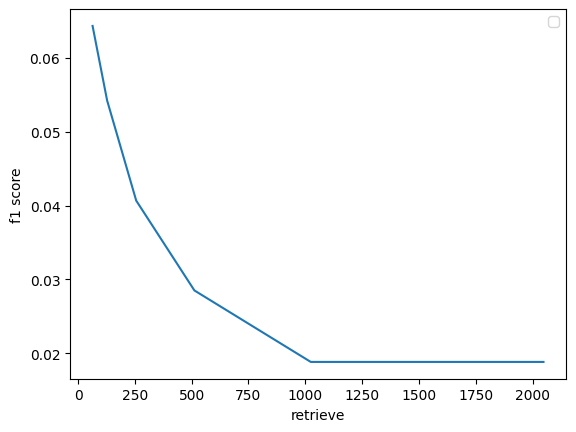

In [7]:
plot_arrays(x,f1,'retrieve',"f1 score")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


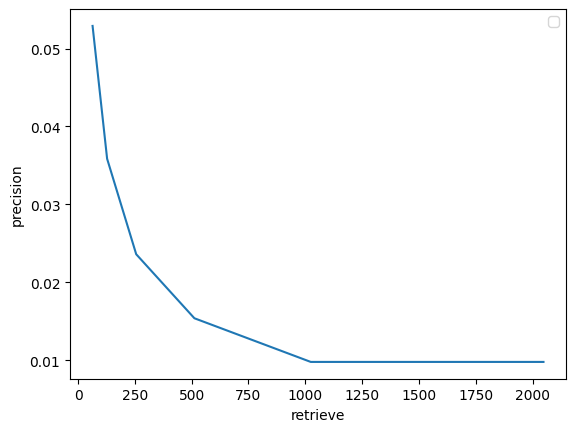

In [8]:
plot_arrays(x,precision,'retrieve',"precision")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


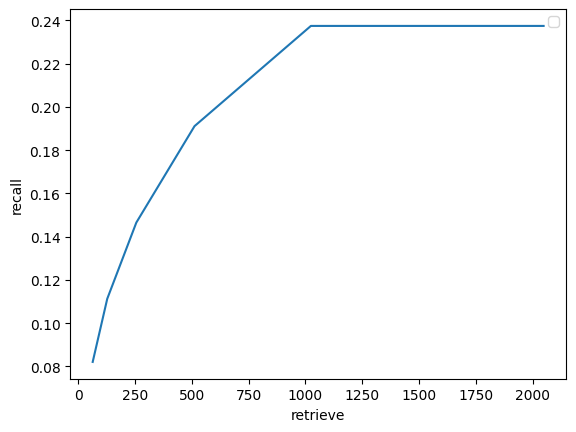

In [9]:
plot_arrays(x,recall ,'retrieve',"recall")